In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib" )

In [2]:
ipl_data = pd.read_csv("../data/matches.csv")
ipl_data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
## required data for prediction
data = ipl_data[['city', 'match_type', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

In [4]:
data.head()

,city,match_type,venue,team1,team2,toss_winner,toss_decision,winner
0,Bangalore,League,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,Chandigarh,League,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,Delhi,League,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils
3,Mumbai,League,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,Kolkata,League,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   city           1044 non-null   object
 1   match_type     1095 non-null   object
 2   venue          1095 non-null   object
 3   team1          1095 non-null   object
 4   team2          1095 non-null   object
 5   toss_winner    1095 non-null   object
 6   toss_decision  1095 non-null   object
 7   winner         1090 non-null   object
dtypes: object(8)
memory usage: 68.6+ KB


In [6]:
data.isnull().sum()

city             51
match_type        0
venue             0
team1             0
team2             0
toss_winner       0
toss_decision     0
winner            5
dtype: int64

In [7]:
data.dropna(inplace = True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12268\339833404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [8]:
data.isnull().sum()

city             0
match_type       0
venue            0
team1            0
team2            0
toss_winner      0
toss_decision    0
winner           0
dtype: int64

In [9]:
data.city.value_counts()

city
Mumbai            173
Kolkata            93
Delhi              89
Chennai            85
Hyderabad          77
Bangalore          63
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          28
Visakhapatnam      15
Durban             15
Lucknow            13
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

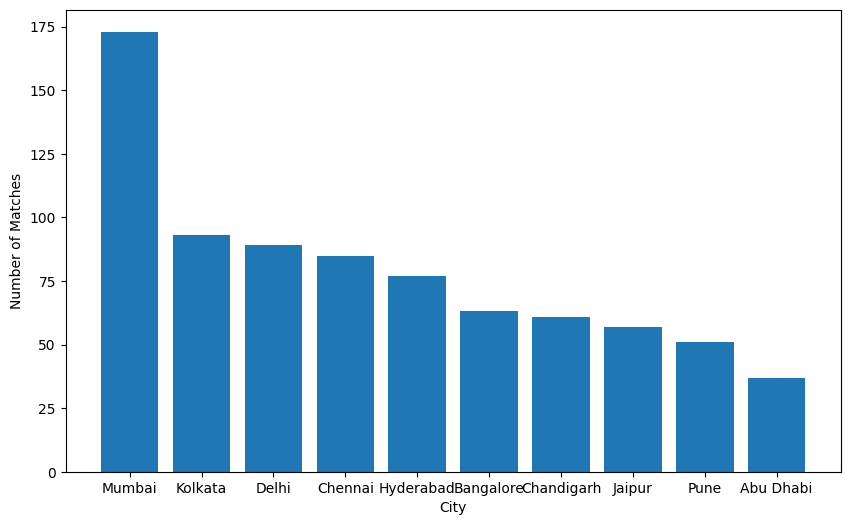

In [10]:
top_cities = data.city.value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values)
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.show()

In [11]:
data['team1'].value_counts()

team1
Chennai Super Kings            124
Royal Challengers Bangalore    123
Mumbai Indians                 118
Kolkata Knight Riders          116
Rajasthan Royals                96
Kings XI Punjab                 86
Delhi Daredevils                82
Sunrisers Hyderabad             80
Deccan Chargers                 39
Delhi Capitals                  32
Punjab Kings                    31
Pune Warriors                   23
Lucknow Super Giants            22
Gujarat Titans                  21
Gujarat Lions                   16
Royal Challengers Bengaluru      9
Kochi Tuskers Kerala             7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Name: count, dtype: int64

In [12]:
data['team1'].replace({'Delhi Daredevils': 'Delhi Capitals','Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings', 'Rising Pune Supergiant':'Lucknow Super Giants','Rising Pune Supergiants':'Lucknow Super Giants', 'Deccan Chargers':"Sunrisers Hyderabad", 'Gujarat Lions':'Gujarat Titans', 'Pune Warriors':'Rajasthan Royals'}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12268\2328570214.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['team1'].replace({'Delhi Daredevils': 'Delhi Capitals','Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings', 'Rising Pune Supergiant':'Lucknow Super Giants','Rising Pune Supergiants':'Lucknow Super Giants', 'Deccan Chargers':"Sunrisers Hyderabad", 'Gujarat Lions':'Gujarat Titans', 'Pune Warriors':'Rajasthan Royals'}, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel

In [13]:
data['team1'].value_counts()

team1
Royal Challengers Bengaluru    132
Chennai Super Kings            124
Sunrisers Hyderabad            119
Rajasthan Royals               119
Mumbai Indians                 118
Punjab Kings                   117
Kolkata Knight Riders          116
Delhi Capitals                 114
Gujarat Titans                  37
Lucknow Super Giants            36
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [14]:
data['team2'].value_counts()

team2
Mumbai Indians                 131
Kolkata Knight Riders          127
Rajasthan Royals               112
Chennai Super Kings            100
Royal Challengers Bangalore    100
Kings XI Punjab                 91
Sunrisers Hyderabad             87
Delhi Daredevils                73
Delhi Capitals                  47
Deccan Chargers                 36
Punjab Kings                    25
Gujarat Titans                  24
Pune Warriors                   22
Lucknow Super Giants            21
Gujarat Lions                   14
Rising Pune Supergiant           9
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Royal Challengers Bengaluru      6
Name: count, dtype: int64

In [15]:
data['team2'].replace({'Delhi Daredevils': 'Delhi Capitals','Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings', 'Rising Pune Supergiant':'Lucknow Super Giants','Rising Pune Supergiants':'Lucknow Super Giants', 'Deccan Chargers':"Sunrisers Hyderabad", 'Gujarat Lions':'Gujarat Titans', 'Pune Warriors':'Rajasthan Royals'}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12268\2805592579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['team2'].replace({'Delhi Daredevils': 'Delhi Capitals','Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings', 'Rising Pune Supergiant':'Lucknow Super Giants','Rising Pune Supergiants':'Lucknow Super Giants', 'Deccan Chargers':"Sunrisers Hyderabad", 'Gujarat Lions':'Gujarat Titans', 'Pune Warriors':'Rajasthan Royals'}, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel

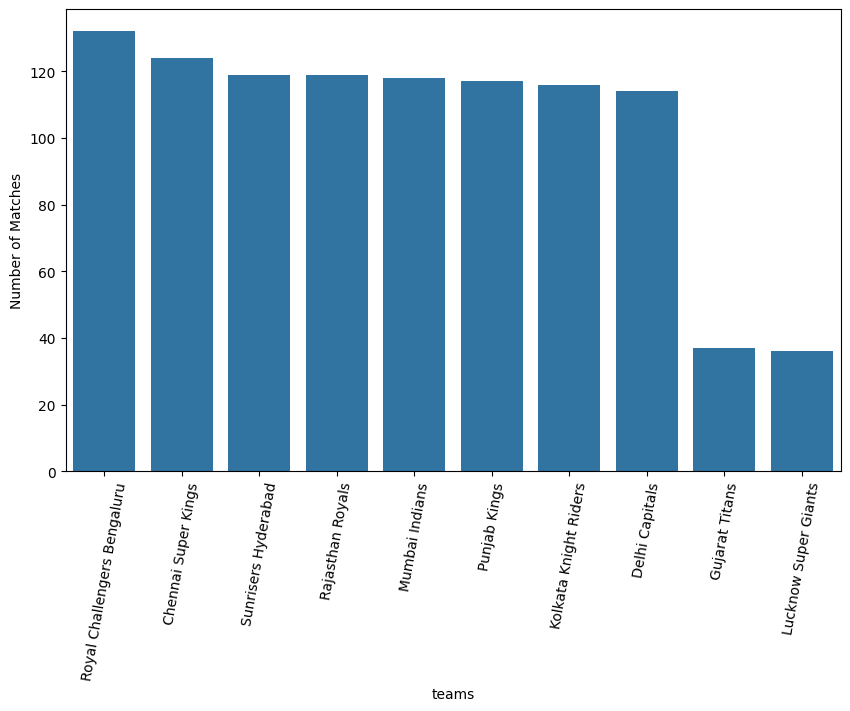

In [16]:
top_teams_team1 = data.team1.value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_teams_team1.index, y=top_teams_team1.values)
plt.xlabel('teams')
plt.ylabel('Number of Matches')
plt.xticks(rotation=80)  
plt.show()


In [17]:
data['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 135
Kolkata Knight Riders          120
Chennai Super Kings            116
Rajasthan Royals               112
Royal Challengers Bangalore    103
Kings XI Punjab                 80
Delhi Daredevils                79
Sunrisers Hyderabad             77
Delhi Capitals                  45
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [18]:
data['toss_winner'].replace({'Delhi Daredevils': 'Delhi Capitals','Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings', 'Rising Pune Supergiant':'Lucknow Super Giants','Rising Pune Supergiants':'Lucknow Super Giants', 'Deccan Chargers':"Sunrisers Hyderabad", 'Gujarat Lions':'Gujarat Titans', 'Pune Warriors':'Rajasthan Royals'}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12268\2183908166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['toss_winner'].replace({'Delhi Daredevils': 'Delhi Capitals','Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings', 'Rising Pune Supergiant':'Lucknow Super Giants','Rising Pune Supergiants':'Lucknow Super Giants', 'Deccan Chargers':"Sunrisers Hyderabad", 'Gujarat Lions':'Gujarat Titans', 'Pune Warriors':'Rajasthan Royals'}, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipy

In [19]:
data['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 135
Rajasthan Royals               132
Delhi Capitals                 124
Kolkata Knight Riders          120
Sunrisers Hyderabad            120
Chennai Super Kings            116
Royal Challengers Bengaluru    111
Punjab Kings                   104
Gujarat Titans                  37
Lucknow Super Giants            32
Kochi Tuskers Kerala             8
Name: count, dtype: int64

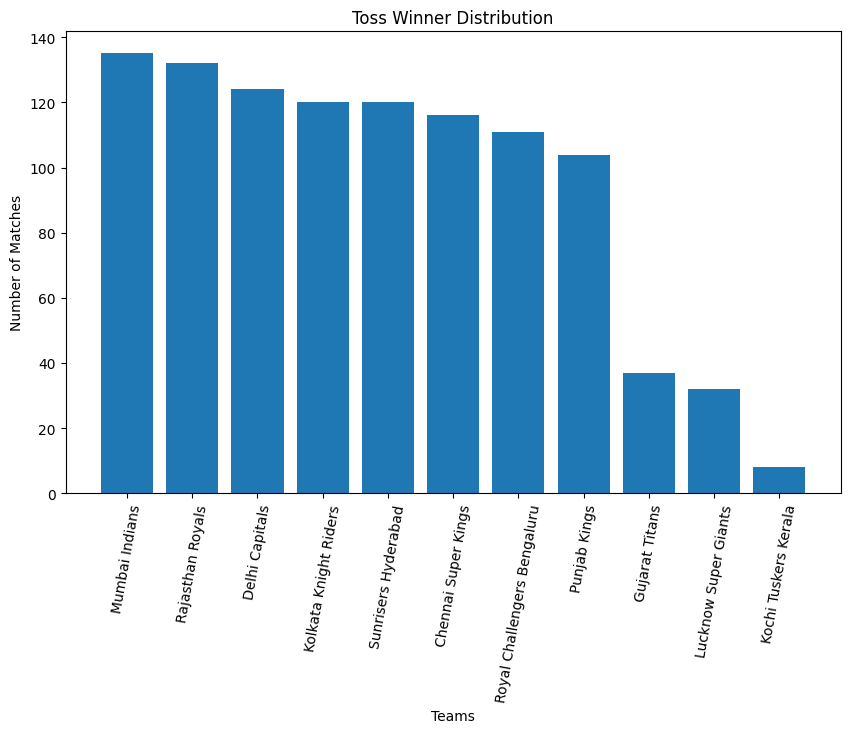

In [20]:
plt.figure(figsize=(10,6))  
plt.title('Toss Winner Distribution')   
plt.bar(data['toss_winner'].value_counts().index, data['toss_winner'].value_counts().values)
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.xticks(rotation=80)
plt.show()

In [21]:
data['toss_decision'].value_counts()

toss_decision
field    670
bat      369
Name: count, dtype: int64

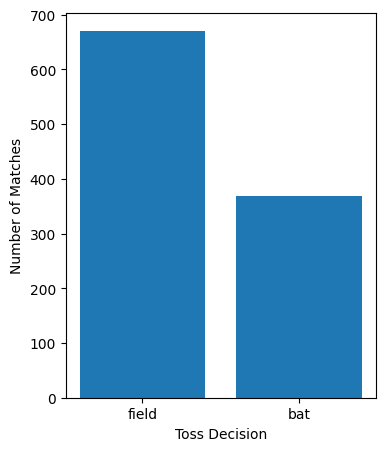

In [22]:
plt.figure(figsize=(4,5))
plt.bar(data['toss_decision'].value_counts().index, data['toss_decision'].value_counts().values)
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches') 
plt.show()


In [23]:
data['winner'].value_counts()

winner
Mumbai Indians                 139
Chennai Super Kings            131
Kolkata Knight Riders          128
Rajasthan Royals               109
Royal Challengers Bangalore    109
Sunrisers Hyderabad             80
Kings XI Punjab                 79
Delhi Daredevils                65
Delhi Capitals                  41
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [24]:
data['winner'].replace({'Delhi Daredevils': 'Delhi Capitals','Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings', 'Rising Pune Supergiant':'Lucknow Super Giants','Rising Pune Supergiants':'Lucknow Super Giants', 'Deccan Chargers':"Sunrisers Hyderabad", 'Gujarat Lions':'Gujarat Titans', 'Pune Warriors':'Rajasthan Royals'}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12268\1140483981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['winner'].replace({'Delhi Daredevils': 'Delhi Capitals','Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings', 'Rising Pune Supergiant':'Lucknow Super Giants','Rising Pune Supergiants':'Lucknow Super Giants', 'Deccan Chargers':"Sunrisers Hyderabad", 'Gujarat Lions':'Gujarat Titans', 'Pune Warriors':'Rajasthan Royals'}, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykerne

In [25]:
data['winner'].value_counts()

winner
Mumbai Indians                 139
Chennai Super Kings            131
Kolkata Knight Riders          128
Rajasthan Royals               121
Royal Challengers Bengaluru    116
Sunrisers Hyderabad            109
Delhi Capitals                 106
Punjab Kings                   103
Gujarat Titans                  41
Lucknow Super Giants            39
Kochi Tuskers Kerala             6
Name: count, dtype: int64

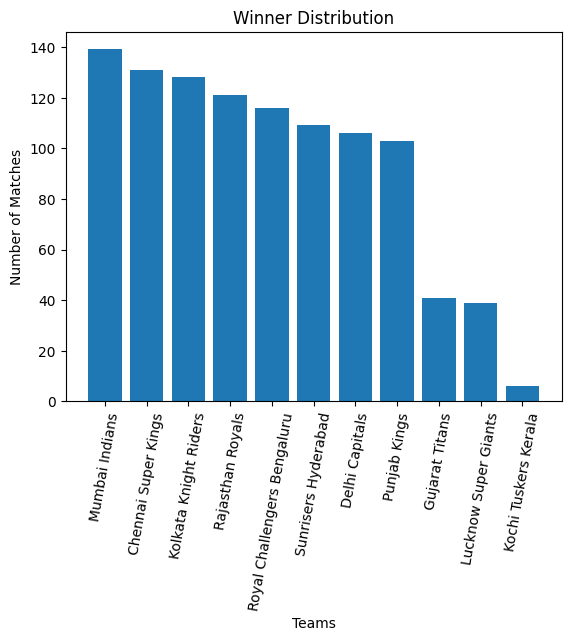

In [26]:
plt.bar(data['winner'].value_counts().index, data['winner'].value_counts().values)
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.title('Winner Distribution')
plt.xticks(rotation=80)
plt.show()

In [27]:
x = len(data['team1'].value_counts().index)
width = 0.3

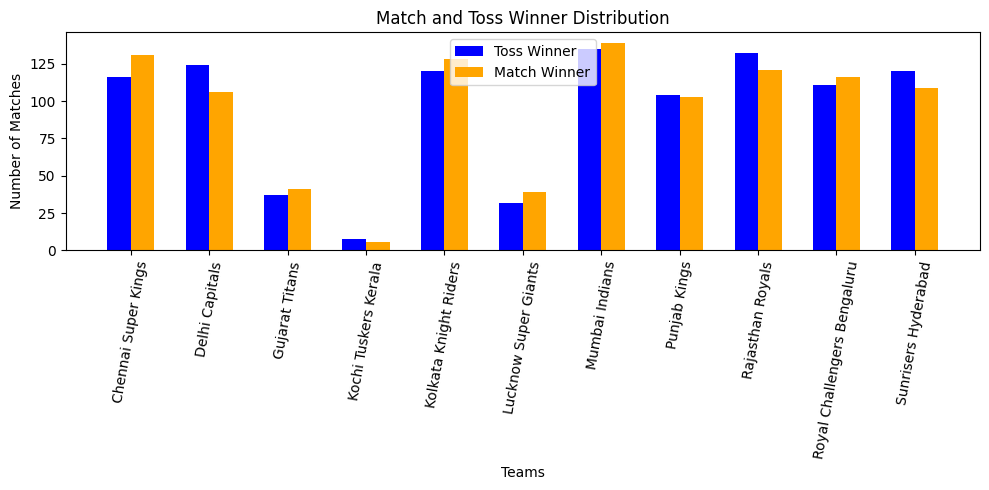

In [28]:
toss_wins = data['toss_winner'].value_counts()
match_wins = data['winner'].value_counts()


teams = set(toss_wins.index).union(set(match_wins.index)) 
teams = sorted(teams)

toss_wins = toss_wins.reindex(teams, fill_value=0)
match_wins = match_wins.reindex(teams, fill_value=0)

x = np.arange(len(teams))
width = 0.3 

# Plot bars
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, toss_wins.values, width=width, label='Toss Winner', color='blue')
plt.bar(x + width/2, match_wins.values, width=width, label='Match Winner', color='orange')

# Formatting
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.xticks(x, teams, rotation=80)  # Rotate labels for readability
plt.title('Match and Toss Winner Distribution')
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent label overlap

plt.show()


In [43]:
data.shape[0]

1039

In [50]:
toss_and_match_winner = []
for i in range(data.shape[0]):
    if data['toss_winner'].iloc[i] == data['winner'].iloc[i]:
        toss_and_match_winner.append(data['winner'].iloc[i])
        


In [ ]:
toss_and_match_winner

['Chennai Super Kings',
 'Rajasthan Royals',
 'Rajasthan Royals',
 'Sunrisers Hyderabad',
 'Chennai Super Kings',
 'Punjab Kings',
 'Rajasthan Royals',
 'Punjab Kings',
 'Punjab Kings',
 'Sunrisers Hyderabad',
 'Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Mumbai Indians',
 'Delhi Capitals',
 'Rajasthan Royals',
 'Royal Challengers Bengaluru',
 'Punjab Kings',
 'Delhi Capitals',
 'Rajasthan Royals',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bengaluru',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Sunrisers Hyderabad',
 'Punjab Kings',
 'Sunrisers Hyderabad',
 'Mumbai Indians',
 'Punjab Kings',
 'Delhi Capitals',
 'Mumbai Indians',
 'Royal Challengers Bengaluru',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Rajasthan Royals',
 'Chennai Super

In [52]:
toss_and_match_winner_df  = pd.DataFrame(toss_and_match_winner)

In [53]:
toss_and_match_winner_df.head()

,0
0,Chennai Super Kings
1,Rajasthan Royals
2,Rajasthan Royals
3,Sunrisers Hyderabad
4,Chennai Super Kings


In [ ]:
toss_and_match_winner_df.count()

0    537
dtype: int64

In [57]:
toss_and_match_winner_df.value_counts()

0                          
Mumbai Indians                 75
Chennai Super Kings            73
Kolkata Knight Riders          68
Rajasthan Royals               65
Delhi Capitals                 60
Royal Challengers Bengaluru    57
Sunrisers Hyderabad            51
Punjab Kings                   42
Gujarat Titans                 24
Lucknow Super Giants           18
Kochi Tuskers Kerala            4
Name: count, dtype: int64

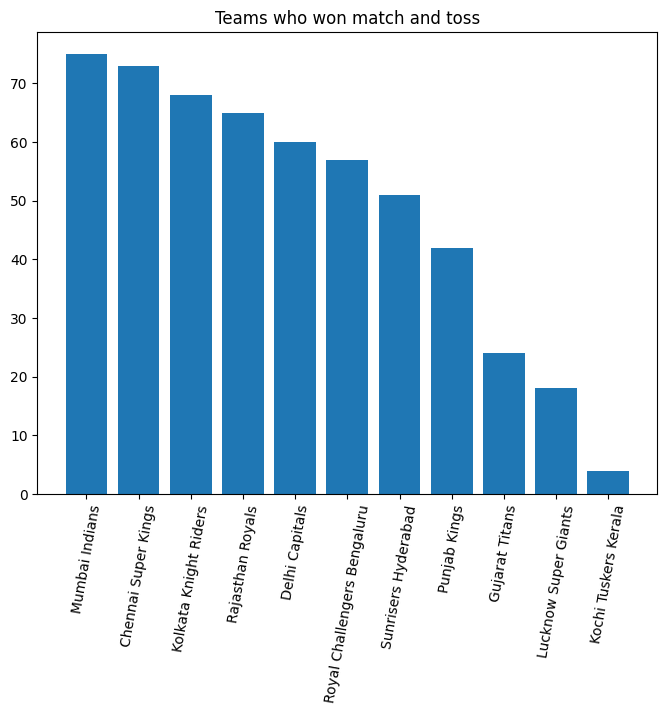

In [66]:
plt.figure(figsize=(8, 6))
plt.bar(toss_and_match_winner_df[0].value_counts().index, toss_and_match_winner_df[0].value_counts().values)
plt.title("Teams who won match and toss")
plt.xticks(rotation = 80)
plt.show()

In [83]:
data['toss_decision'].value_counts()

toss_decision
field    670
bat      369
Name: count, dtype: int64

In [87]:
data['toss_decision'].replace({'field':0, 'bat':1}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_12268\3539312044.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['toss_decision'].replace({'field':0, 'bat':1}, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12268\3539312044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['toss_decision'].replace({'field':0, 'bat':1}, inplace=True)


In [122]:
from sklearn.preprocessing  import LabelEncoder
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [90]:
X = data.drop(columns=['winner', 'match_type'])
y = data['winner']

In [91]:
X.shape

(1039, 6)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, stratify=y)

In [93]:
print(X_train.shape, X_test.shape)

(831, 6) (208, 6)


In [94]:
print(y_train.shape, y_test.shape)

(831,) (208,)


In [96]:
X_train.head()

,city,venue,team1,team2,toss_winner,toss_decision
57,Mumbai,Dr DY Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,0
369,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,1
296,Delhi,Feroz Shah Kotla,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,1
933,Navi Mumbai,"Dr DY Patil Sports Academy, Mumbai",Rajasthan Royals,Delhi Capitals,Delhi Capitals,0
860,Dubai,Dubai International Cricket Stadium,Kolkata Knight Riders,Punjab Kings,Punjab Kings,0


In [97]:
encoders = {}
cat_col = ['city', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision']

In [99]:
for col in cat_col:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    encoders[col] = le

In [105]:
import pickle
with open('../models/label_encoder_x.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [106]:
le_y = LabelEncoder()

In [ ]:
y_train = le_y.fit_transform(y_train)

In [109]:
y_test = le_y.transform(y_test)

In [111]:
with open('../models/label_encoder_y.pkl', 'wb') as f:
    pickle.dump(le_y, f)

In [110]:
X_train.head()

,city,venue,team1,team2,toss_winner,toss_decision
57,26,9,0,8,8,0
369,16,42,10,1,1,1
296,10,16,1,4,1,1
933,28,10,8,1,1,0
860,12,13,4,7,7,0


In [125]:
models = {
    "Logistic regression" : LogisticRegression(max_iter=250), 
    "Random Tree Classifier" : RandomForestClassifier(max_iter = 200),
    "XGBClassifier": XGBClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(), 
    "DecisionTreeClassifier" : DecisionTreeClassifier()
}

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'max_iter'

In [126]:
for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    X_train_pred = model.predict(X_train)
    print(f"train_accuracy:{accuracy_score(X_train_pred, y_train)}")
    X_test_pred = model.predict(X_test)
    print(f"train_accuracy:{accuracy_score(X_test_pred, y_test)}")
    print("-"*50)

Logistic regression


f:\Ipl data analysis\iplenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train_accuracy:0.3008423586040915
train_accuracy:0.28846153846153844
--------------------------------------------------
Random Tree Classifier
train_accuracy:0.9193742478941035
train_accuracy:0.46153846153846156
--------------------------------------------------
XGBClassifier
train_accuracy:0.9193742478941035
train_accuracy:0.41346153846153844
--------------------------------------------------
GradientBoostingClassifier
train_accuracy:0.8868832731648616
train_accuracy:0.42788461538461536
--------------------------------------------------
DecisionTreeClassifier
train_accuracy:0.9193742478941035
train_accuracy:0.4182692307692308
--------------------------------------------------
